In [7]:
import pandas as pd
%pylab inline
from sklearn.linear_model import LinearRegression
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
airlines=pd.read_csv('./airlines.csv')

In [3]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [9]:
airports=pd.read_csv('./airports.csv')

In [5]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [10]:
flights=pd.read_csv('./flights.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
columns = ['ORIGIN_AIRPORT', 'DEPARTURE_DELAY']

In [12]:
small_flights_df = flights[columns]

In [13]:
airports_name = airports[['IATA_CODE', 'AIRPORT']]

In [14]:
small_flights_df = small_flights_df.merge(airports_name, how='left' , left_on='ORIGIN_AIRPORT' , right_on='IATA_CODE' )

In [12]:
small_flights_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,IATA_CODE,AIRPORT
0,ANC,-11.0,ANC,Ted Stevens Anchorage International Airport
1,LAX,-8.0,LAX,Los Angeles International Airport
2,SFO,-2.0,SFO,San Francisco International Airport
3,LAX,-5.0,LAX,Los Angeles International Airport
4,SEA,-1.0,SEA,Seattle-Tacoma International Airport


In [15]:
small_flights_df = small_flights_df[['ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'AIRPORT']]

In [14]:
small_flights_df.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,AIRPORT
0,ANC,-11.0,Ted Stevens Anchorage International Airport
1,LAX,-8.0,Los Angeles International Airport
2,SFO,-2.0,San Francisco International Airport
3,LAX,-5.0,Los Angeles International Airport
4,SEA,-1.0,Seattle-Tacoma International Airport


In [16]:
ANC_delays = small_flights_df[small_flights_df.ORIGIN_AIRPORT == 'ANC']

In [16]:
ANC_delays.head()

,ORIGIN_AIRPORT,DEPARTURE_DELAY,AIRPORT
0,ANC,-11.0,Ted Stevens Anchorage International Airport
15,ANC,-4.0,Ted Stevens Anchorage International Airport
16,ANC,-14.0,Ted Stevens Anchorage International Airport
18,ANC,-4.0,Ted Stevens Anchorage International Airport
32,ANC,NaN,Ted Stevens Anchorage International Airport


In [17]:
list_of_airports = list(set(list(small_flights_df.ORIGIN_AIRPORT)))

In [18]:
dept_delay_by_airport = small_flights_df.groupby(['ORIGIN_AIRPORT'])['DEPARTURE_DELAY'].mean()

In [19]:
dept_by_airport = small_flights_df.groupby(['ORIGIN_AIRPORT'])['DEPARTURE_DELAY'].count()

In [20]:
dept_delay_by_airport.head()

ORIGIN_AIRPORT
10135    10.075221
10136     3.368132
10140     5.682484
10141     1.803030
10146     9.500000
Name: DEPARTURE_DELAY, dtype: float64

In [21]:
dept_by_airport.head()

ORIGIN_AIRPORT
10135     226
10136     182
10140    1707
10141      66
10146      82
Name: DEPARTURE_DELAY, dtype: int64

In [20]:
keys = dept_by_airport.keys()

In [21]:
data_dict = {k:{} for k in keys}

In [22]:
for key in keys:
    data_dict[key]['delay_mean'] = dept_delay_by_airport[key]
    data_dict[key]['departures'] = dept_by_airport[key]

In [4]:
x = [data_dict[k]['departures'] for k in data_dict]
y = [data_dict[k]['delay_mean'] for k in data_dict]

NameError: name 'data_dict' is not defined

In [3]:
plot(x,y,'.')

NameError: name 'x' is not defined

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


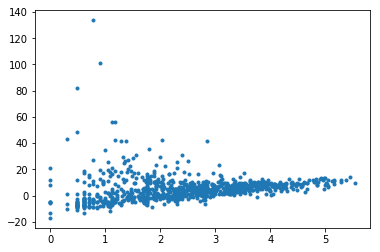

In [24]:
x = log10([data_dict[k]['departures'] for k in data_dict])
y = [data_dict[k]['delay_mean'] for k in data_dict]

plot(x,y,'.')

In [25]:
sns.regplot(x, y, fit_reg = True)

TypeError: only integer scalar arrays can be converted to a scalar index

In [8]:
lm = linear_model.LinearRegression()

NameError: name 'linear_model' is not defined

In [29]:
lm.fit(x, y)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
type(x)

numpy.ndarray

In [31]:
type(y)

list

In [32]:
yarray = np.array(y)

In [33]:
type(y)

list

In [34]:
type(yarray)

numpy.ndarray

In [35]:
lm.fit(x, yarray)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
help(np.isnan)

Help on ufunc object:

isnan = class ufunc(__builtin__.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate ar

In [43]:
xnan = np.isnan(x)

In [39]:
np.argwhere(xnan)

array([], shape=(0, 1), dtype=int64)

In [40]:
list(map(tuple, np.where(xnan)))

[()]

In [45]:
x = x[~numpy.isnan(x)]

In [48]:
pd.isnull(x)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [50]:
pd.isnull(yarray)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [52]:
yarray = yarray[~numpy.isnan(y)]

In [53]:
pd.isnull(yarray)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [54]:
lm.fit(x, yarray)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
x = x[numpy.isfinite(x)]

In [56]:
xwithoutnan = x[~numpy.isnan(x)]

In [57]:
ywithoutnan = yarray[~numpy.isnan(x)]

In [58]:
lm.fit(xwithoutnan, ywithoutnan)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 929]

In [133]:
lm.fit(xwithoutnan.reshape(len(xwithoutnan),1), ywithoutnan)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1]:
predict_outcome = lm.predict(10)
predictions = {}
predictions['intercept'] = lm.intercept_
predictions['coefficient'] = lm.coef_
predictions['predicted_value'] = predict_outcome

NameError: name 'lm' is not defined

In [143]:
print "Intercept", predictions['intercept']
print "Coefficients" , predictions['coefficient']
print "Predicted Value" , predictions['predicted_value']

Intercept 1.50001000104
Coefficients [ 1.47691164]
Predicted Value [ 5.93074492]


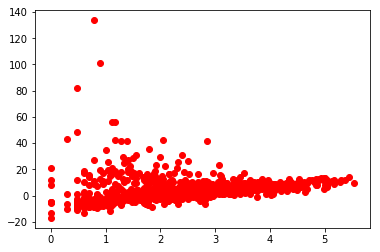

In [75]:
line = plt.scatter(xwithoutnan, ywithoutnan, color='red')

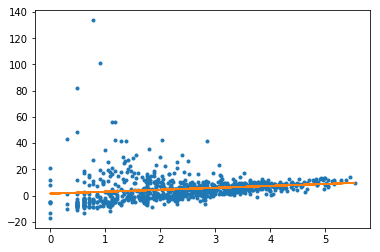

In [98]:
slope , intercept = np.polyfit(xwithoutnan , ywithoutnan ,1)
plt.plot(xwithoutnan, ywithoutnan, '.')
l = plt.plot(xwithoutnan, slope*xwithoutnan + intercept, '-')

In [100]:
l[0].get_data()

(array([ 1.88649073,  2.54900326,  3.12515583,  0.77815125,  4.07364505,
         2.86805636,  1.462398  ,  1.34242268,  2.83884909,  1.79239169,
         3.26810973,  2.92272546,  1.32221929,  0.47712125,  1.73239376,
         2.30535137,  3.19975518,  1.2787536 ,  2.4578819 ,  3.07003787,
         1.5797836 ,  1.72427587,  0.30103   ,  3.18298497,  0.69897   ,
         3.34927753,  1.69019608,  4.92737036,  3.06182931,  3.09447113,
         2.81491318,  1.20411998,  2.76566855,  3.37032801,  2.41329976,
         3.32448823,  1.68124124,  1.        ,  1.81291336,  3.25599573,
         2.31806333,  3.60734778,  2.53655844,  0.        ,  2.67486114,
         3.42651126,  5.28462246,  4.67105245,  3.86213138,  2.34242268,
         3.09307131,  1.97772361,  2.7466342 ,  5.12154343,  2.67577834,
         3.4937368 ,  1.74036269,  3.30189772,  4.37416156,  3.86593267,
         0.77815125,  2.52113808,  1.11394335,  2.79379038,  1.39794001,
         1.04139269,  1.76342799,  2.17318627,  3.4

In [112]:
type(line)

matplotlib.collections.PathCollection

In [113]:
linearray = np.array(line)

In [114]:
type(linearray)

numpy.ndarray

In [119]:
linearray[0].get_data()

IndexError: too many indices for array

In [128]:
plt.plot(xwithoutnan.reshape(len(xwithoutnan,1),lm.predict(xwithoutnan), color='orange',linewidth='4')
plt.show()

SyntaxError: invalid syntax (<ipython-input-128-daa8a440c0c0>, line 2)

In [5]:
help(np.merge)

AttributeError: 'module' object has no attribute 'merge'